## Exercise in Photogrammetry I
## **Ex.9 : Essential Projective Geometry**
### Hand out: xx.xx.xxxx 
### Submission: xx.xx.xxxx 
### Points: 12

## A. Homogenous coordinates

In this task you need to find the intersection of two lines *$l_1$* and $l_2$. The line $l_1$ is defined by two points $x_1 = [98, 352]^T$ and $x_2 = [1548, 543]^T$. You can find the parameters of the line $l_2$ by computing the following $x_3$ and $x_4$ points.

The point $x_3$ is the intersection of the lines $m_1$ and $m_2$. The lines $m_1$ and $m_2$ are determined through the *Hesse normal form* with $\theta_1=35^{\circ}$, $d_1=1210$ and $\theta_2=138^{\circ}$, $d_2=978$. The point $x4$ can be found as an intersection point of lines $m_3$ and $m_4$.

The lines $m_3$and $m_4$ are given in the *intercept form*, where $x_0^3 = 1945$, $y_0^3 = 2761$ and $x_0^4 = -458$, $y_0^3 = 503$.

**Hints**:
- Hesse normal form: $cos(\theta)\cdot x + sin(\theta)\cdot y = d$ 
- Intercept form: $\frac{x}{x_0} + \frac{y}{y_0} = 1$

**Task**:
1. Find the intersection point $s$ of line $l_1$ and $l_2$ using **projective geometry** (homogenous coordinates). Print out the **euclidiean coordinates** of points $s$, $x_3$ and $x_4$. Finally, plot both lines l1 and l2 and verify your results.
<br> *(4 points)*

In [1]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# compute the coordinates of x_3 by using homogenous coordinates
m_1 = np.array([np.cos(np.deg2rad(35)), np.sin(np.deg2rad(35)), 1210])
m_2 = np.array([np.cos(np.deg2rad(138)), np.sin(np.deg2rad(138)), 978])
x_3_hc = np.cross(m_1, m_2)

In [3]:
# compute the coordinates of x_4 by using homogenous coordinates
m_3 = np.array([1 / 1945, 1 / 2761, -1])
m_4 = np.array([1 / -458, 1 / 503, -1])
x_4_hc = np.cross(m_3, m_4)

In [4]:
# Given x_1 and x_2 compute the line l_1
x_1 = np.array([98, 352, 1])
x_2 = np.array([1548, 543, 1])
l_1_hc = np.cross(x_1, x_2)

In [5]:
# Given x_3 and x_4 compute the line l_2
l_2_hc = np.cross(x_3_hc, x_4_hc)

In [6]:
# Given l_1 and l_2 compute the intersection points s
s_hc = np.cross(l_1_hc, l_2_hc)

In [7]:
# print out the euclidean coordinates of s, x_3 and x_4
s = (s_hc[0] / s_hc[2], s_hc[1] / s_hc[2])
x_3 = (x_3_hc[0] / x_3_hc[2], x_3_hc[1] / x_3_hc[2])
x_4 = (x_4_hc[0] / x_4_hc[2], x_4_hc[1] / x_4_hc[2])

print(f's:{s}, x_3:{x_3}, x_4:{x_4}')

s:(511.4445754497806, 406.46063028338494), x_3:(-255.23185484737812, -1745.0617579441528), x_4:(896.8180454265578, 1487.933355566722)


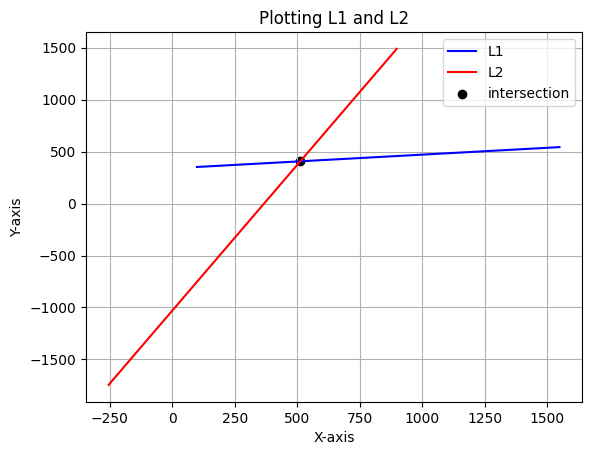

In [8]:
# finally, plot both lines l1 and l2 and verify your results
plt.plot((x_1[0], x_2[0]), (x_1[1], x_2[1]), label='L1', color='blue')
plt.plot((x_3[0], x_4[0]), (x_3[1], x_4[1]), label='L2', color='red')
plt.scatter(s[0], s[1], label='intersection', color='black')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting L1 and L2')
plt.legend()
plt.grid(True)
plt.show()

## B. Projective Geometry

You install a surveillance camera. This is a sensor width *principal point* $x_h = [400, 300]^T$ pel, *camera constant* $c = 550$ pel, *shear* $s = 0$ and *scale difference* $m = 0.0025$. You are also given the coordinates of two points in the world coordinate frame $X_1 = [1, 0, 2]$ m and $X_2 = [2, 3, 1]^T$ m.<br> *(8 points)*

**Tasks**:
1. Assuming the camera is located at the origin of the world with identical orientation, project the 3D points into the sensor coordinate system. Print out the *calibration matrix (K)*, *projection matrix (P)* and the *euclidean coordinates* of the sensor points. <br>*(5 points)*  
2. Let's assume the camera has changed its location to $X_0 = [0.4, 0, 10]^T$ and is rotated by $4^\circ$ around the Y-axis. Taking this transfomation into account, project again the given 3D points to the sensor coordinates and print out the *projection matrix (P)* and the *euclidean coordinates* of the sensor points.<br> *(3 points)*

## B1

In [9]:
# setup the calibration matrix K and print out your result
K = np.array([[550, 550 * 0, 400],
            [0, 550 * (1 + 0.0025), 300],
            [0, 0, 1]])

print(K)

[[550.      0.    400.   ]
 [  0.    551.375 300.   ]
 [  0.      0.      1.   ]]


In [10]:
# setup the projection matrix P and print out your result
R = np.array([[1, 0, 0],
             [0, 1, 0],
             [0, 0, 1]])

P = np.dot(K, R)

print(P)

[[550.      0.    400.   ]
 [  0.    551.375 300.   ]
 [  0.      0.      1.   ]]


In [11]:
# project the 3D points into the sensor coordinate system and print out the euclidean sensor coordinates
X1 = np.array([1, 0, 2])
X2 = np.array([2, 3, 1])

X1_proj = np.dot(P, X1)
X2_proj = np.dot(P, X2)

X1_euclidean = X1_proj / X1_proj[2]
X2_euclidean = X2_proj / X2_proj[2]

np.set_printoptions(suppress=True)

print(X1_euclidean)
print(X2_euclidean)

[675. 300.   1.]
[1500.    1954.125    1.   ]


## B2

In [19]:
# setup the projection matrix P and print out your result

# Convert angle to radians.
theta = np.radians(4)

# Rotation matrix around Y-axis.
R = np.array([[np.cos(theta), 0, np.sin(theta)],
            [0, 1, 0],
            [-np.sin(theta), 0, np.cos(theta)]])

# Translation vector multiplied with 3x3 identity.
T = np.array([[-0.4, 0, 0], 
              [0, 0, 0], 
              [0, 0, -10]])

# Projection matrix.
P = np.dot(K, np.dot(T, R))

print(P)

[[   59.56180392     0.         -4005.60262526]
 [  209.26942123     0.         -2992.69215078]
 [    0.69756474     0.            -9.9756405 ]]


In [20]:
# project the 3D points into the sensor coordinate system and print out the euclidean sensor coordinates
X1_proj = np.dot(P, X1)
X2_proj = np.dot(P, X2)

X1_euclidean = X1_proj / X1_proj[2]
X2_euclidean = X2_proj / X2_proj[2]

print(X1_euclidean)
print(X2_euclidean)

[412.99265742 300.           1.        ]
[452.94260503 300.           1.        ]
